## LAB 6

### 1.1 Data Set Overview
Image recognition has evolved a lot in recent years thanks to the develoment in Machine Learning and Deep Learning realm. It is also fostered by the availablility of mass images resources online due to the rise of social media where people sharing everything online, thus providing a great big data resource for researchers and corporate alike to dig into it.

Among other websites, ImageNet is a very good place to start for researchers looking for data set to train their algorithm. It has over 14 million images URLs that has been categorized and labeled into 'synset' (synonym set). Each synset holds more than 1000 images that are quality controlled and human-annotated. Perfect to be used in deep learning training set and also a good fit for this project.

However, ImageNet doesn't host the images on it server that researchers can directly download. Instead, they provide URLs for the images that user can download, and then use these URLs to download the images themselves. So we manually downloaded the images using some Python codes, reading from the URLs and pass it into Python for downloading. Once they are downloaded, we manually pick out the bad quality ones(ones with multiple irrelevant subjects and/or noise), and leave 200 images for each synset.

The synset we downloaded are all flowers. There are totally five of them:
Rose, Tulip, Peony, Hydrangea and Blue Bonnet. 
Each synset has 200 images. For each image, we desaturated it and resized it into 120x120 size for ease of processing.

For this project, the goal is to create an effective flower idenfitication algorithm that can recognize a flower from a photo. Learning from a dataset that already has flower name labeled, the algorithm should be able to reach a high recognition rate for different flowers

## 1.Data collection

In [1]:
# import necessary modules
import os
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2grey as r2g
from skimage.transform import resize as resize

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
%matplotlib inline
from keras.utils import np_utils
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier , KerasRegressor

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from sklearn.pipeline import Pipeline
import os
import numpy as np

In [3]:
# List all classes' images
rose = os.listdir('Dataset/Rose/')
peony = os.listdir('Dataset/Peony/')
tulip = os.listdir('Dataset/Tulip/')
hydrangea = os.listdir('Dataset/Hydrangea')
blue_bonnet = os.listdir('Dataset/Blue Bonnet/')

# check all the filenames have been properly read in
print(len(rose), len(peony), len(tulip), len(hydrangea), len(blue_bonnet))
rose[0:10]

200 200 200 200 200


['3029879879_a14b728d8e.jpg',
 '501238787_31c63ee125.jpg',
 '2377073044_15c00557ca.jpg',
 'pink_rose_wallpaper_3029.jpg',
 '3358633739_b3e5a4c81d.jpg',
 '2578727714_764b2eef68.jpg',
 '3957541498_90ecb264e3.jpg',
 '717744395_aeea39dd7a.jpg',
 '5639899820_396e948649.jpg',
 '92758666_5c47ce8eb6.jpg']

### 2.2 Image Pre-processing

In [4]:
data = []    # array holding all the images
target = [] # array holding all the categories 

# for each category, read in the image and do resizing, gray-scale and flatenning
for i in rose:
    img = imread('Dataset/Rose/'+i)
    img_grey = r2g(img)
    img_resize = resize(img_grey, (120, 120))
    imgX = img_resize.ravel()
    data.append(imgX)
    target.append(0)
    
    
for i in peony:
    img = imread('Dataset/Peony/'+i)
    img_grey = r2g(img)
    img_resize = resize(img_grey, (120, 120))
    imgX = img_resize.ravel()
    data.append(imgX)
    target.append(1)    
0
for i in tulip:
    img = imread('Dataset/Tulip/'+i)
    img_grey = r2g(img)
    img_resize = resize(img_grey, (120, 120))
    imgX = img_resize.ravel()
    data.append(imgX)
    target.append(2)
    
for i in hydrangea:
    img = imread('Dataset/Hydrangea/'+i)
    img_grey = r2g(img)
    img_resize = resize(img_grey, (120, 120))
    imgX = img_resize.ravel()
    data.append(imgX)
    target.append(3)
    
for i in blue_bonnet:
    img = imread('Dataset/Blue Bonnet/'+i)
    img_grey = r2g(img)
    img_resize = resize(img_grey, (120, 120))
    imgX = img_resize.ravel()
    data.append(imgX)
    target.append(4)
    
data = np.asarray(data)
target = np.asarray(target)

# check the shape of the data to verify everything is in good shape
print(data.shape)
print(target.shape)

(1000, 14400)
(1000,)


### Data Reduction

In [5]:
# get some of the specifics of the dataset
X = data
y = target
names = ['Rose','Blue Bonnet','Hydrangea','Tulip','Peony']
namesarray = np.asarray(names)
print(namesarray)
n_samples, n_features = X.shape

n_classes = len(names)
h = 120
w = 120
print(np.sum(~np.isfinite(X)))
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))
print (h*w) # the size of the images are the size of the feature vectors


['Rose' 'Blue Bonnet' 'Hydrangea' 'Tulip' 'Peony']
0
n_samples: 1000
n_features: 14400
n_classes: 5
Original Image Sizes 120 by 120
14400


In [6]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [7]:
X.shape

(1000, 14400)

In [8]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 600
print ("Extracting the top %d eigenflowers from %d flowers" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenflowers = pca.components_.reshape((n_components, h, w))

plot_explained_variance(pca)

Extracting the top 600 eigenflowers from 1000 flowers
CPU times: user 16.9 s, sys: 647 ms, total: 17.6 s
Wall time: 8.99 s


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [9]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Extracting the top 600 eigenflowers from 1000 flowers
CPU times: user 20.2 s, sys: 905 ms, total: 21.1 s
Wall time: 11.2 s


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


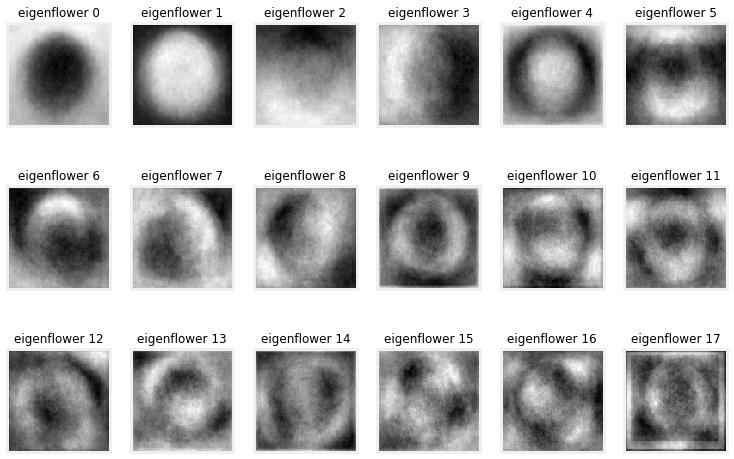

In [10]:
n_components = 600
print ("Extracting the top %d eigenflowers from %d flowers" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenflowers = pca.components_.reshape((n_components, h, w))

plot_explained_variance(pca)

eigenflower_titles = ["eigenflower %d" % i for i in range(eigenflowers.shape[0])]
plot_gallery(eigenflowers, eigenflower_titles, h, w)
plt.show()

def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

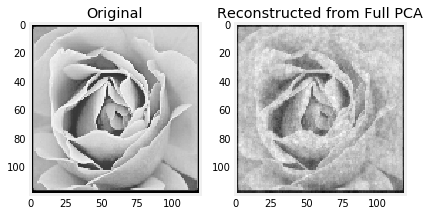

In [11]:
idx_to_reconstruct = 4    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()
plt.show()

### Feature Extraction

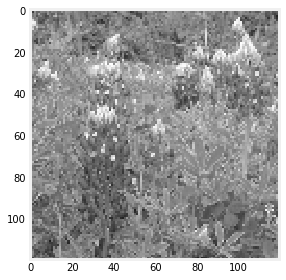

In [12]:
from skimage.io import imshow

idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((h,w))

imshow(img)

plt.grid()
plt.show()

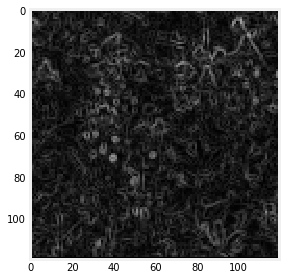

In [13]:
from skimage.filters import sobel_h, sobel_v

gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid()
plt.show()

### Evaluation

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

In [15]:
#Splitting data using Shuffle Split
s_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in s_split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Precision 0.27762674257 [ 0.27194472  0.38384184  0.14888889  0.26666667  0.27073386  0.36555184
  0.27991342  0.21142344  0.30255526  0.27474747]
CPU times: user 1min 17s, sys: 2.89 s, total: 1min 20s
Wall time: 47.6 s


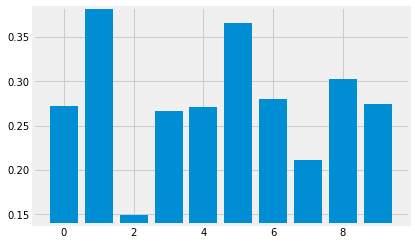

In [16]:
%%time
# select model
clf = LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', clf)])
#select cross validation
cv = KFold(n_splits=10, shuffle=False, random_state=None).split(X_train, y_train)
# select evaluation criteria

my_scorer = make_scorer(precision_score,average='macro')
#my_scorer = make_scorer(accuracy_score)

per_fold_eval_criteria = cross_val_score(estimator=pipe,
                                    X=X_train,
                                    y=y_train,
                                    cv=cv,#integer, to specify the number of folds in a (Stratified)KFold
                                    scoring=my_scorer)

print('Precision', np.mean(per_fold_eval_criteria), per_fold_eval_criteria)

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

Like we mentioned in the Evaluation Criteria section, we need high recall and resonable precision. To further explore the idea, we made a Cost Matrix like below:

| Cost	| Predict No 	| Predict Yes	|
|----	|----	|----	|
| Actual No 	| 0 	| 10 	|
| Actual Yes 	| 100 	| -1 	|

As we can see from the above matrix.  
If the flower is not rare and we predict it sit to be not rare, we don't care about this situation, so we give it a cost of 0.
If the flower is rare and we predict it as rare, then it help us, actually reducing the cost, so we give it a -1 cost.
If the flower is rare and we predict it as not rare, it means we lose the sales from the flower which is a big hit  on the revenue. So we give it a 100 cost.  
If the flower is not rare but we predict it as rare, it's not good for us but maybe OK. We will send it to expert to manually clasify it, thus adding some but not very much cost. We give it a cost of 10. We experimented with different methods for dividing our data into training and testing

## Cross validation
With train/test split, high variance estimate was observed as the testing accuracy significantly depends on which observations happen to be in the testing set. This dependency and high variance were not a good points to go ahead with train/test split for our data.

With KFold cross validation method,we are able to achieve more accurate estimate of out-of-sample accuracy. Also,it gives very less variance as number of folds increases. Using this method makes the division or test and train data less trivial as all the samples in the dataset gets to be in training and test set ones.

Hence, we are using KFold cross validation, it is less impacted by biases by over- or under-representation as it works better for balanced classes. It helps us detect over-fitting by letting us know when our fitting approach isn't generalizing to new data.

### TODO (Mrunal , Dhwani)

Need to explain valuation and how one is splitting into testing and training.

[15 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

[15 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

#### Use Pipeline to perform PCA (and scaling if needed) and then do Cross validation.

# Convolution Neural Network

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

keras.__version__

'2.1.5'

In [18]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(np.expand_dims(X_test, axis=1)), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f')
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f')
        plt.title('MLP: '+str(acc_mlp))
        
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))

In [19]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

dummy_y_train = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)

dummy_y_test = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

dummy_y = np_utils.to_categorical(encoded_Y)

NUM_CLASSES = n_classes

In [20]:
%%time

y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

CPU times: user 485 µs, sys: 21 µs, total: 506 µs
Wall time: 348 µs


# TODO : 
Change to Precision.

In [21]:
def convolution_model(img_wh = 120):
    # changes: 
    #    1. Baseline: 2 conv layers and two output layers
    cnn1 = Sequential()
    cnn1.add(Reshape((1,img_wh, img_wh), input_shape=(1,img_wh**2)))

    num_filt_layers = [24, 24]
    for num_filters in num_filt_layers:
        cnn1.add(Conv2D(filters=num_filters, 
                        kernel_size=(3,3), 
                        padding='same'))
        cnn1.add(Activation('relu'))
        cnn1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))


    # add one layer on flattened output
    cnn1.add(Flatten())
    cnn1.add(Dense(100, activation='relu'))
    cnn1.add(Dense(100, activation='relu'))
    cnn1.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn1.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    return cnn1
    

In [22]:
#estimators = []
#estimators.append(('standardize', StandardScaler()))
#estimators.append(('pca', PCA(n_components=600)))
#estimators.append(('clf', KerasClassifier(build_fn=convolution_model, epochs=100, batch_size=32, verbose=0)))

#pipe_lr = Pipeline(estimators)

#pipe_lr.fit(np.expand_dims(X_train, axis=1),y= y_train_ohe)

In [23]:
%%time

cnn1 = convolution_model()
cnn1.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=100, 
        shuffle=True, verbose=0)

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras


CPU times: user 10min 40s, sys: 16min 18s, total: 26min 59s
Wall time: 8min 8s


# Lin's code starts here:

In [24]:
%%time

# manipulated from Keras Documentation
#  https://keras.io/applications/
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

res_model = ResNet50(weights='imagenet')

CPU times: user 7.45 s, sys: 203 ms, total: 7.66 s
Wall time: 7.36 s


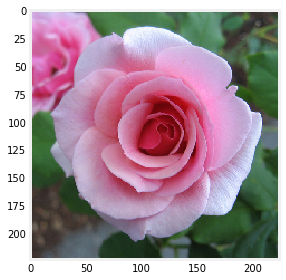

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.io import imshow

img_path = 'Dataset/Rose/202527974_7e93356ad5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
imshow(image.img_to_array(img)/255)
plt.grid(False)

In [26]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = res_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03476684', 'hair_slide', 0.46787795), ('n04116512', 'rubber_eraser', 0.048026573), ('n03991062', 'pot', 0.046528582)]


In [27]:
# from keras.datasets import cifar10
from scipy.misc import imresize

NUM_CLASSES = 5
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
# y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

print(X_train.shape)
print(y_train_ohe.shape)

print(X_test.shape)
print(y_test_ohe.shape)

(800, 14400)
(800, 5)
(200, 14400)
(200, 5)


In [28]:
X_train = X_train.reshape(800, 120, 120)
print(X_train.shape)

X_test = X_test.reshape(200, 120, 120)
print(X_test.shape)

(800, 120, 120)
(200, 120, 120)


In [29]:
import numpy as np
x_train = np.stack([X_train, X_train, X_train], axis=-1)
x_test = np.stack([X_test, X_test, X_test], axis=-1)

In [30]:
%%time
x_train_up = [imresize(x,size=(224,224,3), interp='nearest') for x in x_train]
x_train_up = np.stack(x_train_up,axis=0)
print(x_train_up.shape)

x_test_up = [imresize(x,size=(224,224,3), interp='nearest') for x in x_test]
x_test_up = np.stack(x_test_up,axis=0)
print(x_test_up.shape)

(800, 224, 224, 3)
(200, 224, 224, 3)
CPU times: user 531 ms, sys: 46.9 ms, total: 578 ms
Wall time: 580 ms


In [31]:
# connect new layers to the output
from keras.models import Input, Model
x = res_model.output
NUM_CLASSES = 5


# let's add a fully-connected layer
x = Dense(1024, activation='relu',kernel_initializer='he_uniform')(x)
# and a fully connected layer 
predictions = Dense(NUM_CLASSES, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=res_model.input, outputs=predictions)

# freeze ResNet during training
for layer in res_model.layers:
    layer.trainable = False
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_up,y_train_ohe,epochs=1,batch_size=64,verbose=1)

Epoch 1/1
800/800 [==============================] - 260s 325ms/step - loss: 1.5462 - acc: 0.5550


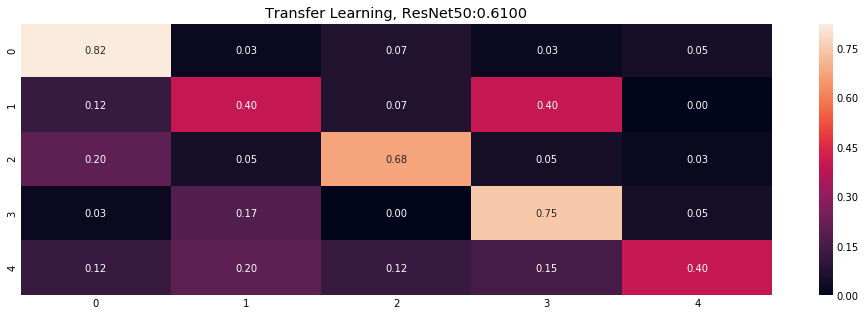

In [32]:
summarize_net(model, x_test_up, y_test, title_text='Transfer Learning, ResNet50:')

### Multi-Layer Perceptron

In [24]:
%%time
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train.shape[1], units=30, activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

CPU times: user 27.2 s, sys: 1.82 s, total: 29 s
Wall time: 18 s


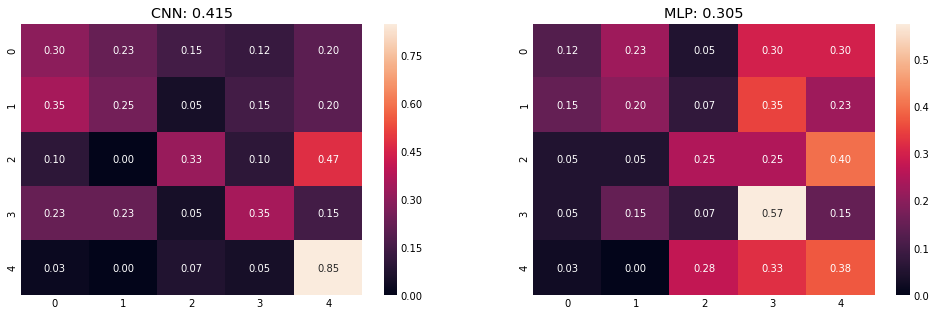

In [25]:
compare_mlp_cnn(cnn1,mlp,X_test,y_test)

## Cross Validation

In [26]:
##Takes a while.
#estimator = KerasClassifier(build_fn=convolution_model, epochs=100, verbose=0,batch_size = 32)
#kfold = KFold(n_splits=10, shuffle=True, random_state=7)

#results = cross_val_score(estimator, np.expand_dims(X_train, axis=1), y_train_ohe, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#plt.bar(range(len(results)),results)
#plt.ylim([min(results)-0.01,max(results)])

# Advanced CNN

In [27]:

def convolution_model2(img_wh = 120):
    # Copy TensorFlow Architecture from 
    #   Deep MNIST for experts
    #   https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html

    # Manipulated to mirror parts of this network:
    #   http://ankivil.com/mnist-database-and-simple-classification-networks/

    cnn2 = Sequential()
    cnn2.add(Reshape((1,img_wh, img_wh), input_shape=(1,img_wh**2)))

    num_filt_layers = [32, 64]
    for num_filters in num_filt_layers:
        cnn2.add(Conv2D(filters=num_filters, 
                        kernel_size=(3,3), 
                        padding='same', 
                        activation='relu')) # more compact syntax

        # max pooling
        cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))


    # add one layer on flattened output
    cnn2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
    cnn2.add(Flatten())
    cnn2.add(Dense(1024, activation='relu'))
    cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                  optimizer='rmsprop', # 'adadelta' 'rmsprop'
                  metrics=['accuracy'])
    
    return cnn2
    


In [28]:
cnn2 = convolution_model2()

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn2.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=64, epochs=100, 
        shuffle=True, verbose=0,
        validation_data=(np.expand_dims(X_test, axis=1),y_test_ohe))



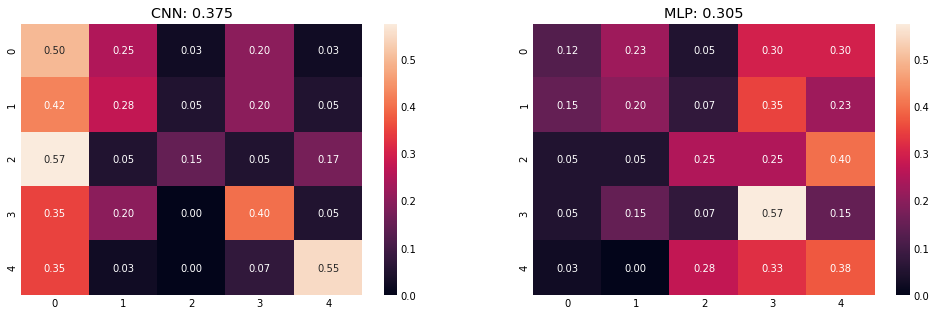

In [29]:
compare_mlp_cnn(cnn2,mlp,X_test,y_test)

# More Advanced CNNET

In [30]:
# what if we just want to use the validation data??
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001

def convolution_model3(img_wh = 120):

    # Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
    # Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
    cnn = Sequential()

    cnn.add(Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')) # more compact syntax

    cnn.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

    cnn.add(Conv2D(filters=64,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')) # more compact syntax

    cnn.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

    cnn.add(Conv2D(filters=128,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')) # more compact syntax

    cnn.add(Conv2D(filters=128,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu'))


    # add one layer on flattened output

    cnn.add(Flatten())
    cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
    cnn.add(Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
           ))
    cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
    cnn.add(Dense(NUM_CLASSES, 
                  activation='softmax', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 ))
    
    return cnn

In [31]:
img_wh = 120
# NEW: Let's start by fixing the sizes
X_train = np.expand_dims(X_train.reshape((-1,img_wh,img_wh)), axis=3)
X_test = np.expand_dims(X_test.reshape((-1,img_wh,img_wh)), axis=3)
# the image data has been resized to (samples,image_rows,image_cols,image_channels)

## Image manipulation done here.

# TODO : Mrunal And Dhwani

Please explain what manipulation you are doing and why so?

In [32]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.5, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.5,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=0)

datagen.fit(X_train)


Image augmentation playes crucial role to make our model rhobus. Sometimes after training the dataset again and again it gets habituated with same orientation or type of input image by scalling it little bit it our training set gets the example of same image with little changed data and thus it becomes easier to predict the images. 

In [33]:
cnn = convolution_model3()

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
history_cnn = cnn.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                  steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                  epochs=50, verbose=1,
                  validation_data=(X_test,y_test_ohe),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                 )

Epoch 1/50
6/6 [==============================] - 4s 596ms/step - loss: 8.4114 - acc: 0.1921 - val_loss: 2.1678 - val_acc: 0.2300
Epoch 2/50
6/6 [==============================] - 1s 177ms/step - loss: 1.8866 - acc: 0.2018 - val_loss: 1.7123 - val_acc: 0.3250
Epoch 3/50
6/6 [==============================] - 1s 165ms/step - loss: 1.7944 - acc: 0.2324 - val_loss: 1.7196 - val_acc: 0.2850
Epoch 4/50
6/6 [==============================] - 1s 164ms/step - loss: 1.7165 - acc: 0.2194 - val_loss: 1.7076 - val_acc: 0.3150
Epoch 5/50
6/6 [==============================] - 1s 175ms/step - loss: 1.7288 - acc: 0.2266 - val_loss: 1.7030 - val_acc: 0.2500
Epoch 6/50
6/6 [==============================] - 1s 175ms/step - loss: 1.9501 - acc: 0.2368 - val_loss: 1.6924 - val_acc: 0.2250
Epoch 7/50
6/6 [==============================] - 1s 162ms/step - loss: 1.7064 - acc: 0.2474 - val_loss: 1.6928 - val_acc: 0.2650
Epoch 8/50
6/6 [==============================] - 1s 158ms/step - loss: 1.6867 - acc: 0.29

In [34]:
#LeNet
from keras.layers import average, concatenate
from keras.models import Input, Model

def convolution_model_resnet(img_wh = 120):
    %%time

    # now lets use the LeNet architecture with batch norm
    # We will also use ReLU where approriate and drop out 
    from keras.layers.normalization import BatchNormalization
    from keras.layers import Add

    input_holder = Input(shape=(img_wh, img_wh, 1))

    # start with a conv layer
    x = Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', 
                   data_format="channels_last")(input_holder)

    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

    x = Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', 
                   data_format="channels_last")(x)

    x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

    x = Conv2D(filters=64,
                   kernel_size=(1,1),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', 
                   data_format="channels_last")(x_split)

    x = Conv2D(filters=64,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', 
                   data_format="channels_last")(x)

    x = Conv2D(filters=32,
                   kernel_size=(1,1),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', 
                   data_format="channels_last")(x)

    # now add back in the split layer, x_split (residual added in)
    x = Add()([x, x_split])
    x = Activation("relu")(x)

    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

    x = Flatten()(x)
    x = Dropout(0.25)(x)
    x = Dense(256)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(NUM_CLASSES)(x)
    x = Activation('softmax')(x)

    resnet = Model(inputs=input_holder,outputs=x)

    resnet.summary()
    
    return resnet

In [35]:
resnet = convolution_model_resnet()

resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
history_res = resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                      epochs=50, verbose=1,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 120, 1)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 120, 120, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 60, 60, 32)   0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 60, 60, 32)   9248        max_pooling2d_7[0][0]            
_____________________________________________

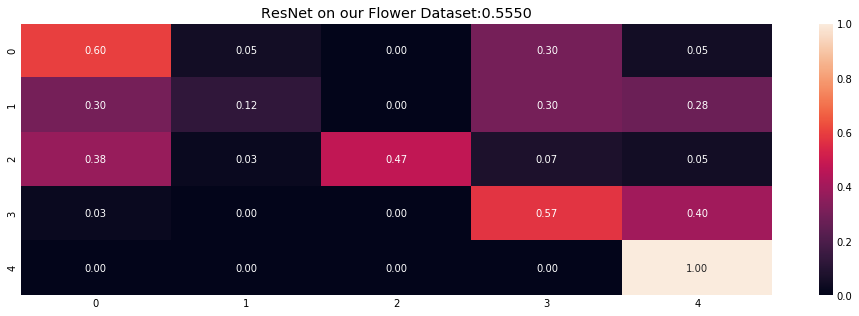

In [36]:
#compare_mlp_cnn(resnet,mlp,X_test,y_test)
summarize_net(resnet, X_test, y_test, title_text='ResNet on our Flower Dataset:')

# TODO : Mrunal And Dhwani

Please explain results of the outputs.

[15 points] Visualize the final results of the CNNs and interpret the performance. Use proper statistics as appropriate, especially for comparing models. 

[10 points] Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.  

#### Use ROC Curve from Lab 5. Find new methods of comparing performance, Micro Averaging , Macro Averaging.

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def plotROC (n_classes,y_test_bin,y_score): 
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    
    print("Area under the curve : ", roc_auc)

In [38]:
def plot_performance(history): 
    from matplotlib import pyplot as plt

    %matplotlib inline

    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['acc'])

    plt.ylabel('Accuracy %')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_acc'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('MSE Training Loss')
    plt.xlabel('epochs')

    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')

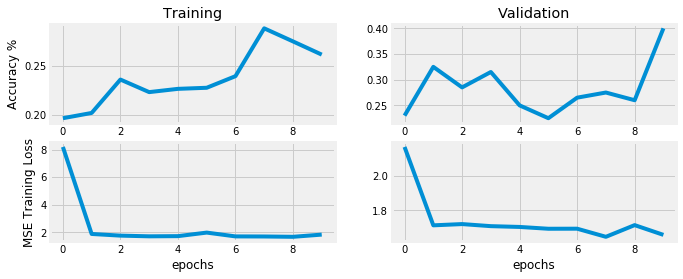

In [39]:
plot_performance(history_cnn)

In [40]:
class KerasBatchClassifier(KerasClassifier):
    """
    Add fit_generator to KerasClassifier to convert sparse matrices to numpy arrays before fitting.
    """

    def fit(self, X, y, **kwargs):
        if not issparse(X[0]):
            return super().fit(X, y, **kwargs)

        # taken from keras.wrappers.scikit_learn.KerasClassifier.fit ###################################################
        if self.build_fn is None:
            self.model = self.__call__(**self.filter_sk_params(self.__call__))
        elif not isinstance(self.build_fn, types.FunctionType) and not isinstance(self.build_fn, types.MethodType):
            self.model = self.build_fn(**self.filter_sk_params(self.build_fn.__call__))
        else:
            self.model = self.build_fn(**self.filter_sk_params(self.build_fn))

        loss_name = self.model.loss
        if hasattr(loss_name, '__name__'):
            loss_name = loss_name.__name__
        if loss_name == 'categorical_crossentropy' and len(y.shape) != 2:
            y = to_categorical(y)

        fit_args = copy.deepcopy(self.filter_sk_params(Sequential.fit_generator))
        fit_args.update(kwargs)
        ################################################################################################################

        early_stopping = EarlyStopping(monitor="val_loss", patience=3, verbose=5, mode="auto")
        model_checkpoint = ModelCheckpoint("results/best_weights.{epoch:02d}-{val_loss:.5f}.hdf5", monitor="val_loss", verbose=5, save_best_only=True, mode="auto")
        callbacks = [early_stopping, model_checkpoint]
        fit_args.update({"callbacks": callbacks})

        self.__history = self.model.fit_generator(
            self.batch_generator(X, y, batch_size=self.sk_params["batch_size"]),
            samples_per_epoch=X.shape[0],
            **fit_args)

        return self.__history

    def score(self, X, y, **kwargs):
        kwargs = self.filter_sk_params(Sequential.evaluate, kwargs)

        # sparse to numpy array
        X = KerasBatchClassifier.sparse_to_array(X)

        loss_name = self.model.loss
        if hasattr(loss_name, '__name__'):
            loss_name = loss_name.__name__
        if loss_name == 'categorical_crossentropy' and len(y.shape) != 2:
            y = to_categorical(y)
        outputs = self.model.evaluate(X, y, **kwargs)
        if type(outputs) is not list:
            outputs = [outputs]
        for name, output in zip(self.model.metrics_names, outputs):
            if name == 'acc':
                return output
        raise Exception('The model is not configured to compute accuracy. '
                        'You should pass `metrics=["accuracy"]` to '
                        'the `model.compile()` method.')

    @staticmethod
    def batch_generator(X, y, batch_size=128):
        n_splits = len(X) // (batch_size)
        X = np.array_split(X, n_splits)
        y = np.array_split(y, n_splits)

        while True:
            for Xy in zip(X, y):
                yield (KerasBatchClassifier.sparse_to_array(Xy[0]), Xy[1])

    @staticmethod
    def sparse_to_array(sparse_list):
        array_list = []
        for s in sparse_list:
            array_list.append(s.toarray().astype(np.int8))
        return np.array(array_list)

    @property
    def history(self):
        return self.__history

In [41]:
# from keras.wrappers.scikit_learn import KerasClassifier

# estimator = KerasClassifier(build_fn=cnn, epochs=400, verbose=0,batch_size = 32)
# kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# plt.bar(range(len(results)),results)
# plt.ylim([min(results)-0.01,max(results)])

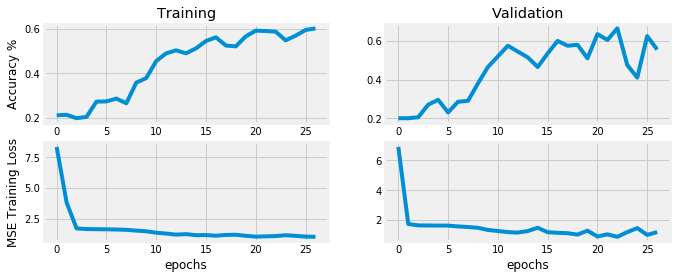

In [42]:
plot_performance(history_res)

In [43]:
# from keras.wrappers.scikit_learn import KerasClassifier

# estimator = KerasClassifier(build_fn=resnet, epochs=400, verbose=0,batch_size = 32)
# kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# plt.bar(range(len(results)),results)
# plt.ylim([min(results)-0.01,max(results)])

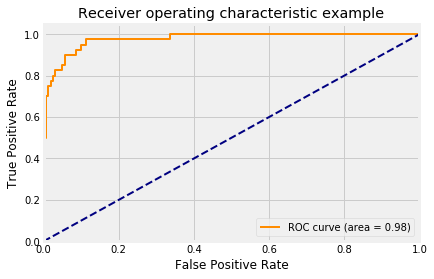

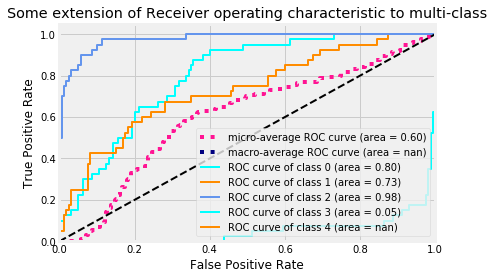

Area under the curve :  {0: 0.79765624999999996, 1: 0.729375, 2: 0.97624999999999995, 3: 0.052968750000000002, 4: nan, 'micro': 0.60311011904761902, 'macro': nan}


In [44]:
y_score = resnet.predict(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 4, 5])
n_classes = y_test_bin.shape[1]

plotROC(y_score = y_score , y_test_bin = y_test_bin, n_classes= n_classes)

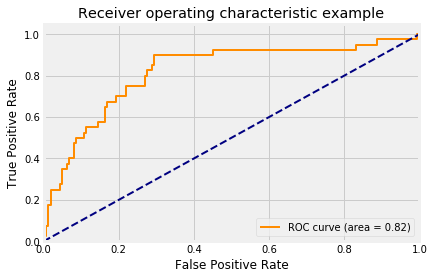

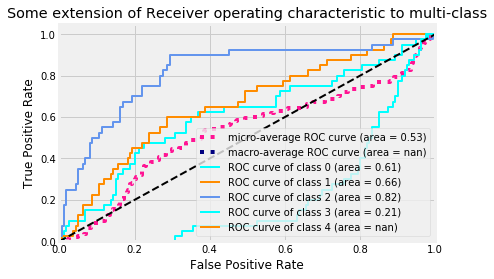

Area under the curve :  {0: 0.60749999999999993, 1: 0.65984375000000006, 2: 0.8181250000000001, 3: 0.21328125000000001, 4: nan, 'micro': 0.52636160714285718, 'macro': nan}


In [46]:
y_score = cnn.predict(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 4, 5])

n_classes = y_test_bin.shape[1]

plotROC(y_score = y_score , y_test_bin = y_test_bin, n_classes= n_classes)

# TODO : PRECISION SCORE ANALYSIS , EXCEPTIONAL CREDIT ; CROSS VALIDATION USING FIT GENERATOR